In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option("display.max_columns",None)

In [2]:
import math
import seaborn as sns
sns.set_style("whitegrid")
import missingno as msno
from sklearn.preprocessing import StandartScaler

ImportError: cannot import name 'StandartScaler' from 'sklearn.preprocessing' (C:\Users\mertg\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
pip install missingno

In [11]:
data=pd.read_csv("vgsales.csv")

In [10]:
data.shape

(16598, 11)

In [12]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
data.isnull().sum() #Eksik verinin olup olmadığını gösterir.

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [15]:
drap_row_index = data[data["Year"]>2015].index
data = data.drop(drap_row_index) #2015 yılından sonraki eksik verilerin olup olmadığını gösterir.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16250 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16250 non-null  int64  
 1   Name          16250 non-null  object 
 2   Platform      16250 non-null  object 
 3   Year          15979 non-null  float64
 4   Genre         16250 non-null  object 
 5   Publisher     16194 non-null  object 
 6   NA_Sales      16250 non-null  float64
 7   EU_Sales      16250 non-null  float64
 8   JP_Sales      16250 non-null  float64
 9   Other_Sales   16250 non-null  float64
 10  Global_Sales  16250 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [18]:
data.shape

(16250, 11)

In [19]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16250.000000,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,8233.153785,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,4775.382512,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4095.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8213.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12340.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [20]:
data.describe(include=["object","bool"])

,Name,Platform,Genre,Publisher
count,16250,16250,16250,16194
unique,11296,31,12,566
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2162,3196,1331


In [21]:
data["Genre"].value_counts()

Genre
Action          3196
Sports          2308
Misc            1721
Role-Playing    1446
Shooter         1278
Adventure       1252
Racing          1229
Platform         876
Simulation       857
Fighting         834
Strategy         671
Puzzle           582
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

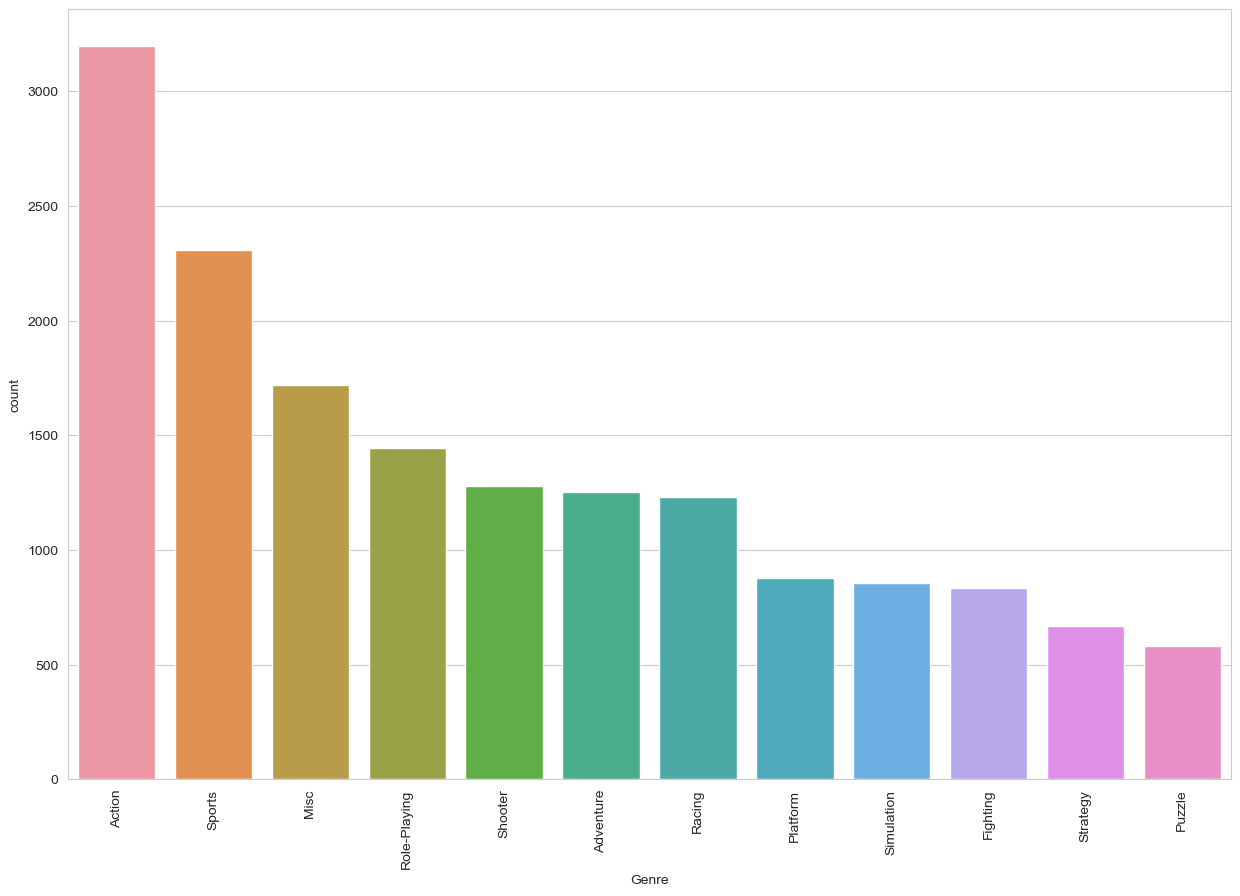

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.countplot(x="Genre", data=data, order=data["Genre"].value_counts().index)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

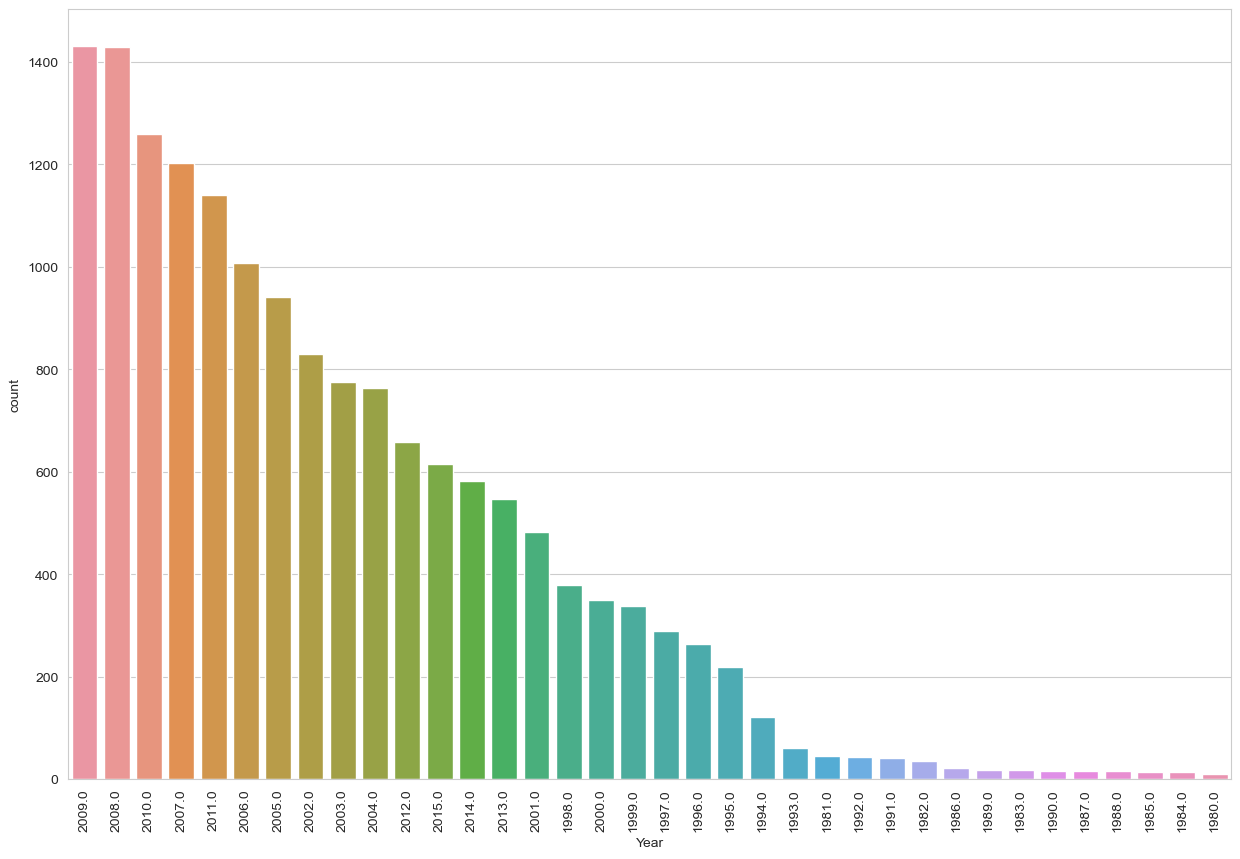

In [25]:
plt.figure(figsize=(15,10))     #En çok satış yapılan yıl
sns.countplot(x="Year", data=data, order=data.groupby(by=["Year"])["Name"].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

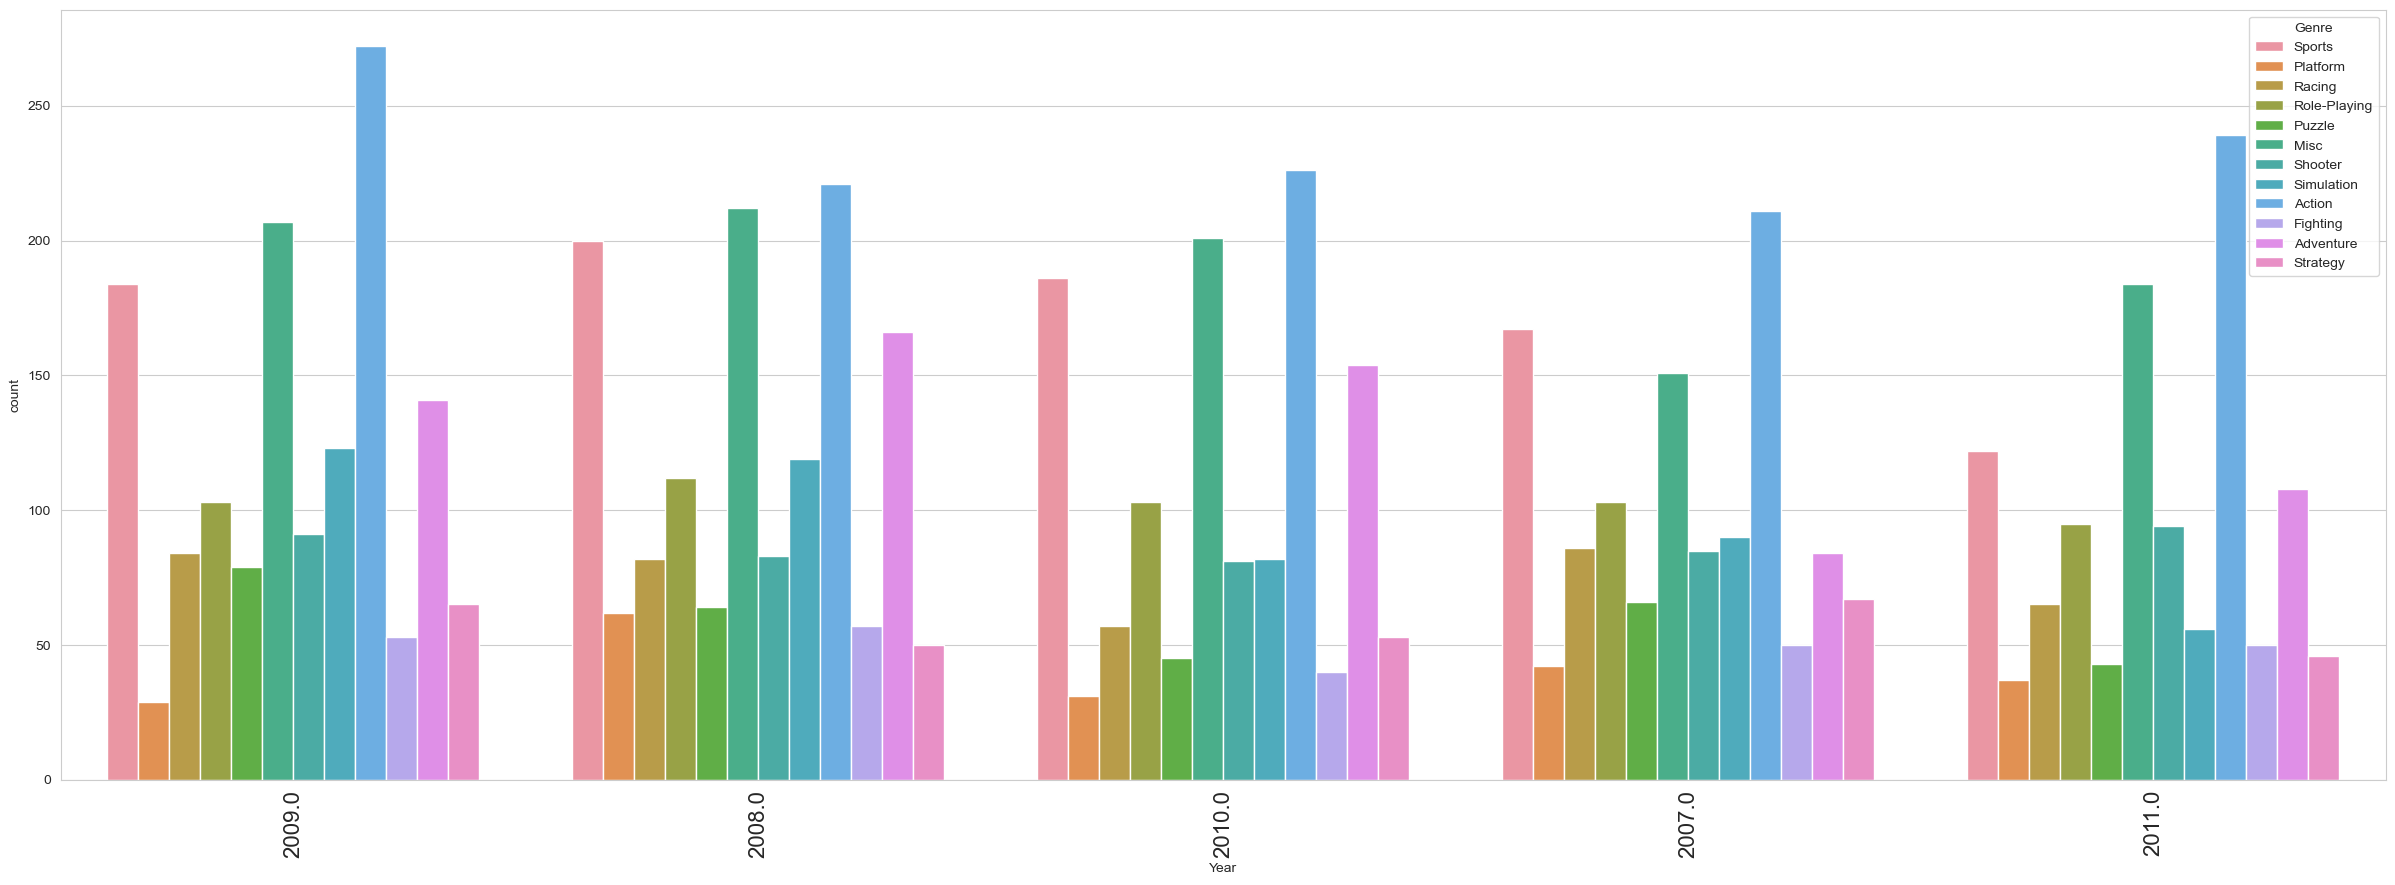

In [26]:
plt.figure(figsize=(30,10))     #En çok oyunun çıktığı 5 yıl
sns.countplot(x="Year", data=data,hue="Genre",order=data.Year.value_counts().iloc[:5].index)
plt.xticks(rotation=90,size=16)
plt.show

In [27]:
#Küresel satış sütunu ile hangi yılın dünya genelinde en yüksek satış değerlerine sahip olduğunu belirleyelim.
data_year=data.groupby(by=["Year"])["Global_Sales"].sum()
data_year=data_year.reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

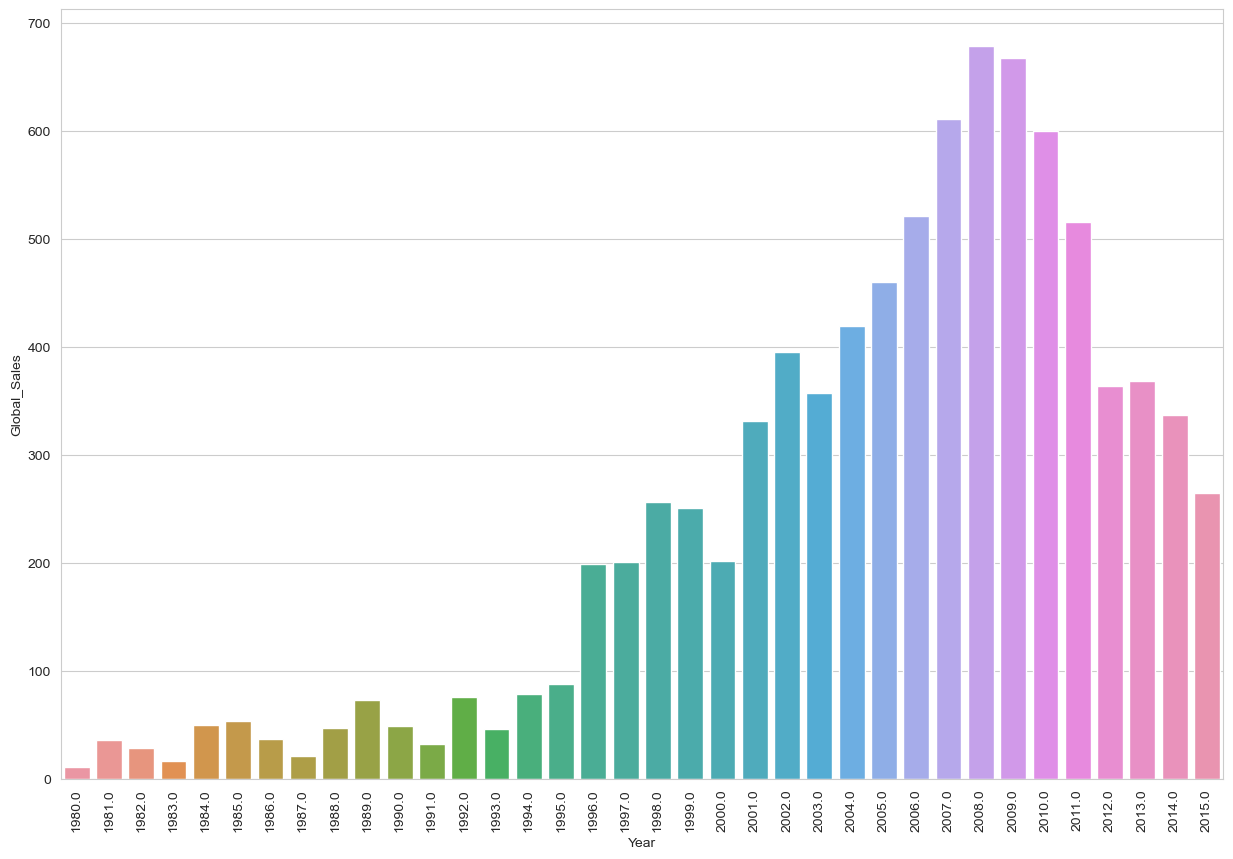

In [30]:
plt.figure(figsize=(15,10))     
sns.barplot(x="Year",y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
plt.show

In [33]:
#Bir yılda en çok hangi oyunun yayımlandı
year_max_df=data.groupby(by=["Year","Genre"]).size().reset_index(name="count") #yıl ve genre sütunlarına göre gruplandırlıp her bir grubun boyutu hesaplanıp count adında yeni bir veri çerçevesi oluşturulur.
year_max_idx=year_max_df.groupby(["Year"])["count"].transform(max)==year_max_df["count"] #her yılın en yüksek sayıya sahip türünü bulduk
year_max_genre=year_max_df[year_max_idx].reset_index(drop=True) #en yüksek sayıya sahip satırları seçtik ve yeni bir veri çerçevesi değişkenine atadık
year_max_genre=year_max_genre.drop_duplicates(subset=["Year","count"],keep="last").reset_index(drop=True) #year ve count sütunlarına göre yinelenen satırları kaldırdık ve veri çerçevesi yeniden düzenlenmiş oldu.

In [34]:
genre=year_max_genre["Genre"].values

In [35]:
genre #türleri genre isimli değişkene atamış olduk

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

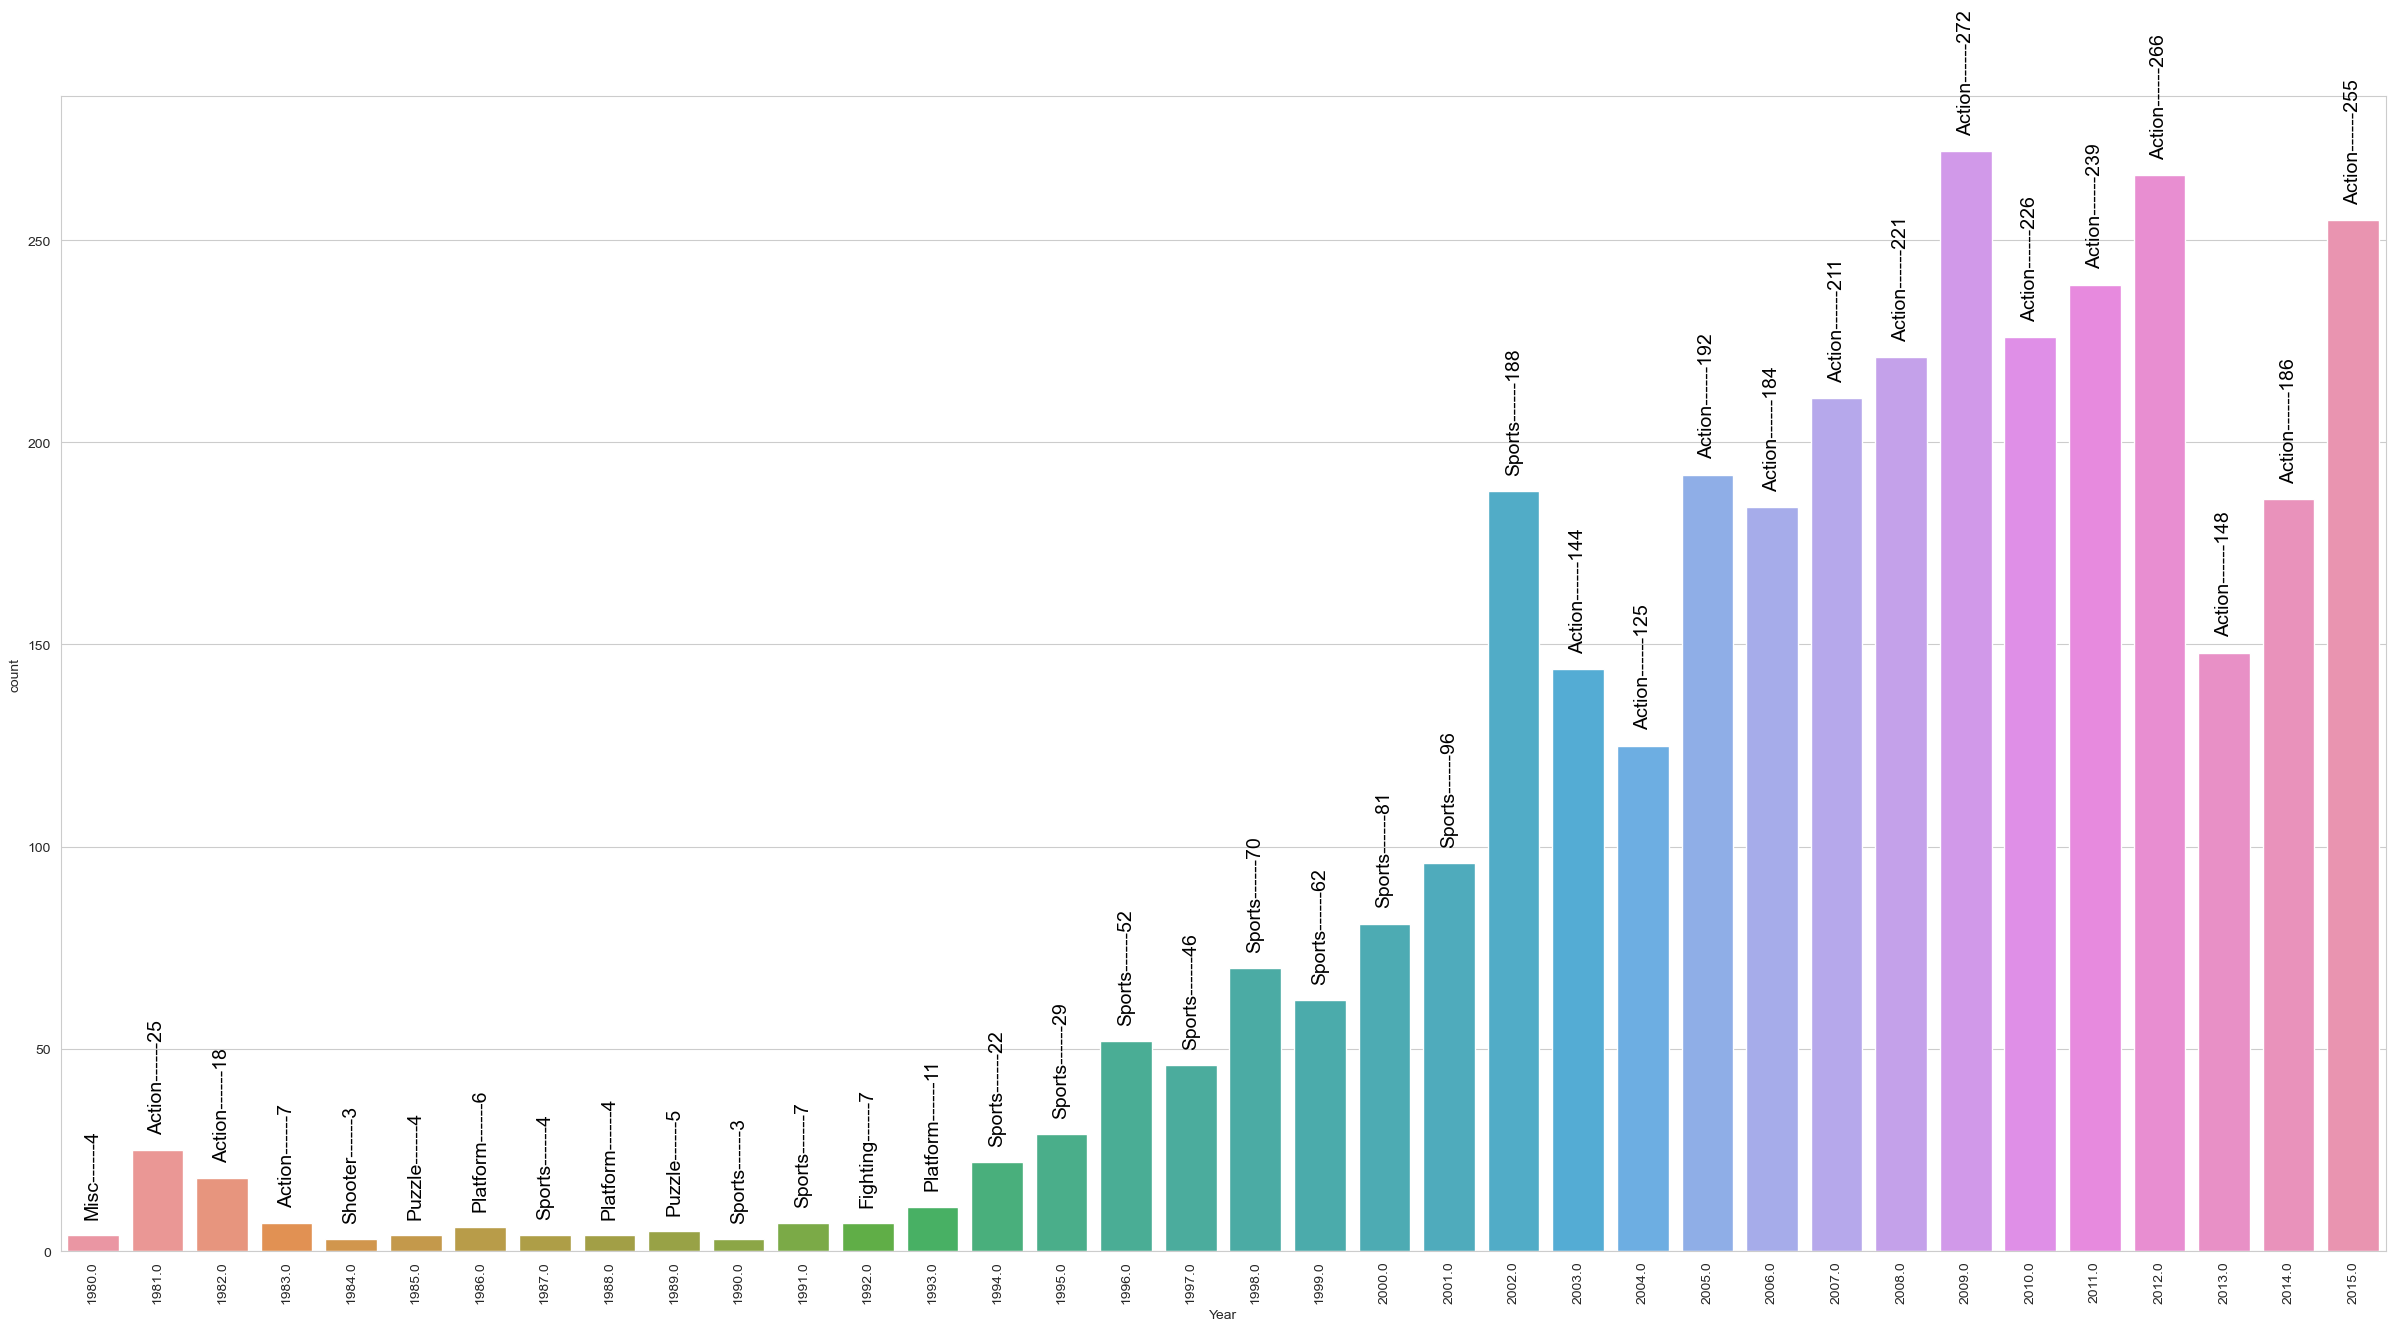

In [37]:
plt.figure(figsize=(30,15))
g=sns.barplot(x="Year",y="count",data=year_max_genre)
index=0
for value in year_max_genre["count"].values:   #for döngüsünde her çubuk üzerine ilgili türün ve sayısının yazılmasını sağladık
    g.text(index,value+5,str(genre[index] + "------" + str(value)) , color="#000",size=14,rotation=90,ha="center")
    index+=1 
plt.xticks(rotation=90)
plt.show       

In [38]:
year_sale_dx=data.groupby(by=["Year","Genre"])["Global_Sales"].sum().reset_index()  #yıl ve genre sütunlarına göre gruplandırılıp group global sale sütununda toplam küresel satış miktarını hesaplar ve year_sale_dx adında yeni bir değişkene atar
year_sale=year_sale_dx.groupby(by=["Year"])["Global_Sales"].transform(max)==year_sale_dx["Global_Sales"] # her yılın en yüksek satış miktarına sahip satırları belirledik
year_sale_max=year_sale_dx[year_sale].reset_index(drop=True) #en yüksek küresel satış miktarına sahip satırları seçtik ve yeni bir veri seti içerisine ekledik

In [40]:
genre=year_sale_max["Genre"]

<function matplotlib.pyplot.show(close=None, block=None)>

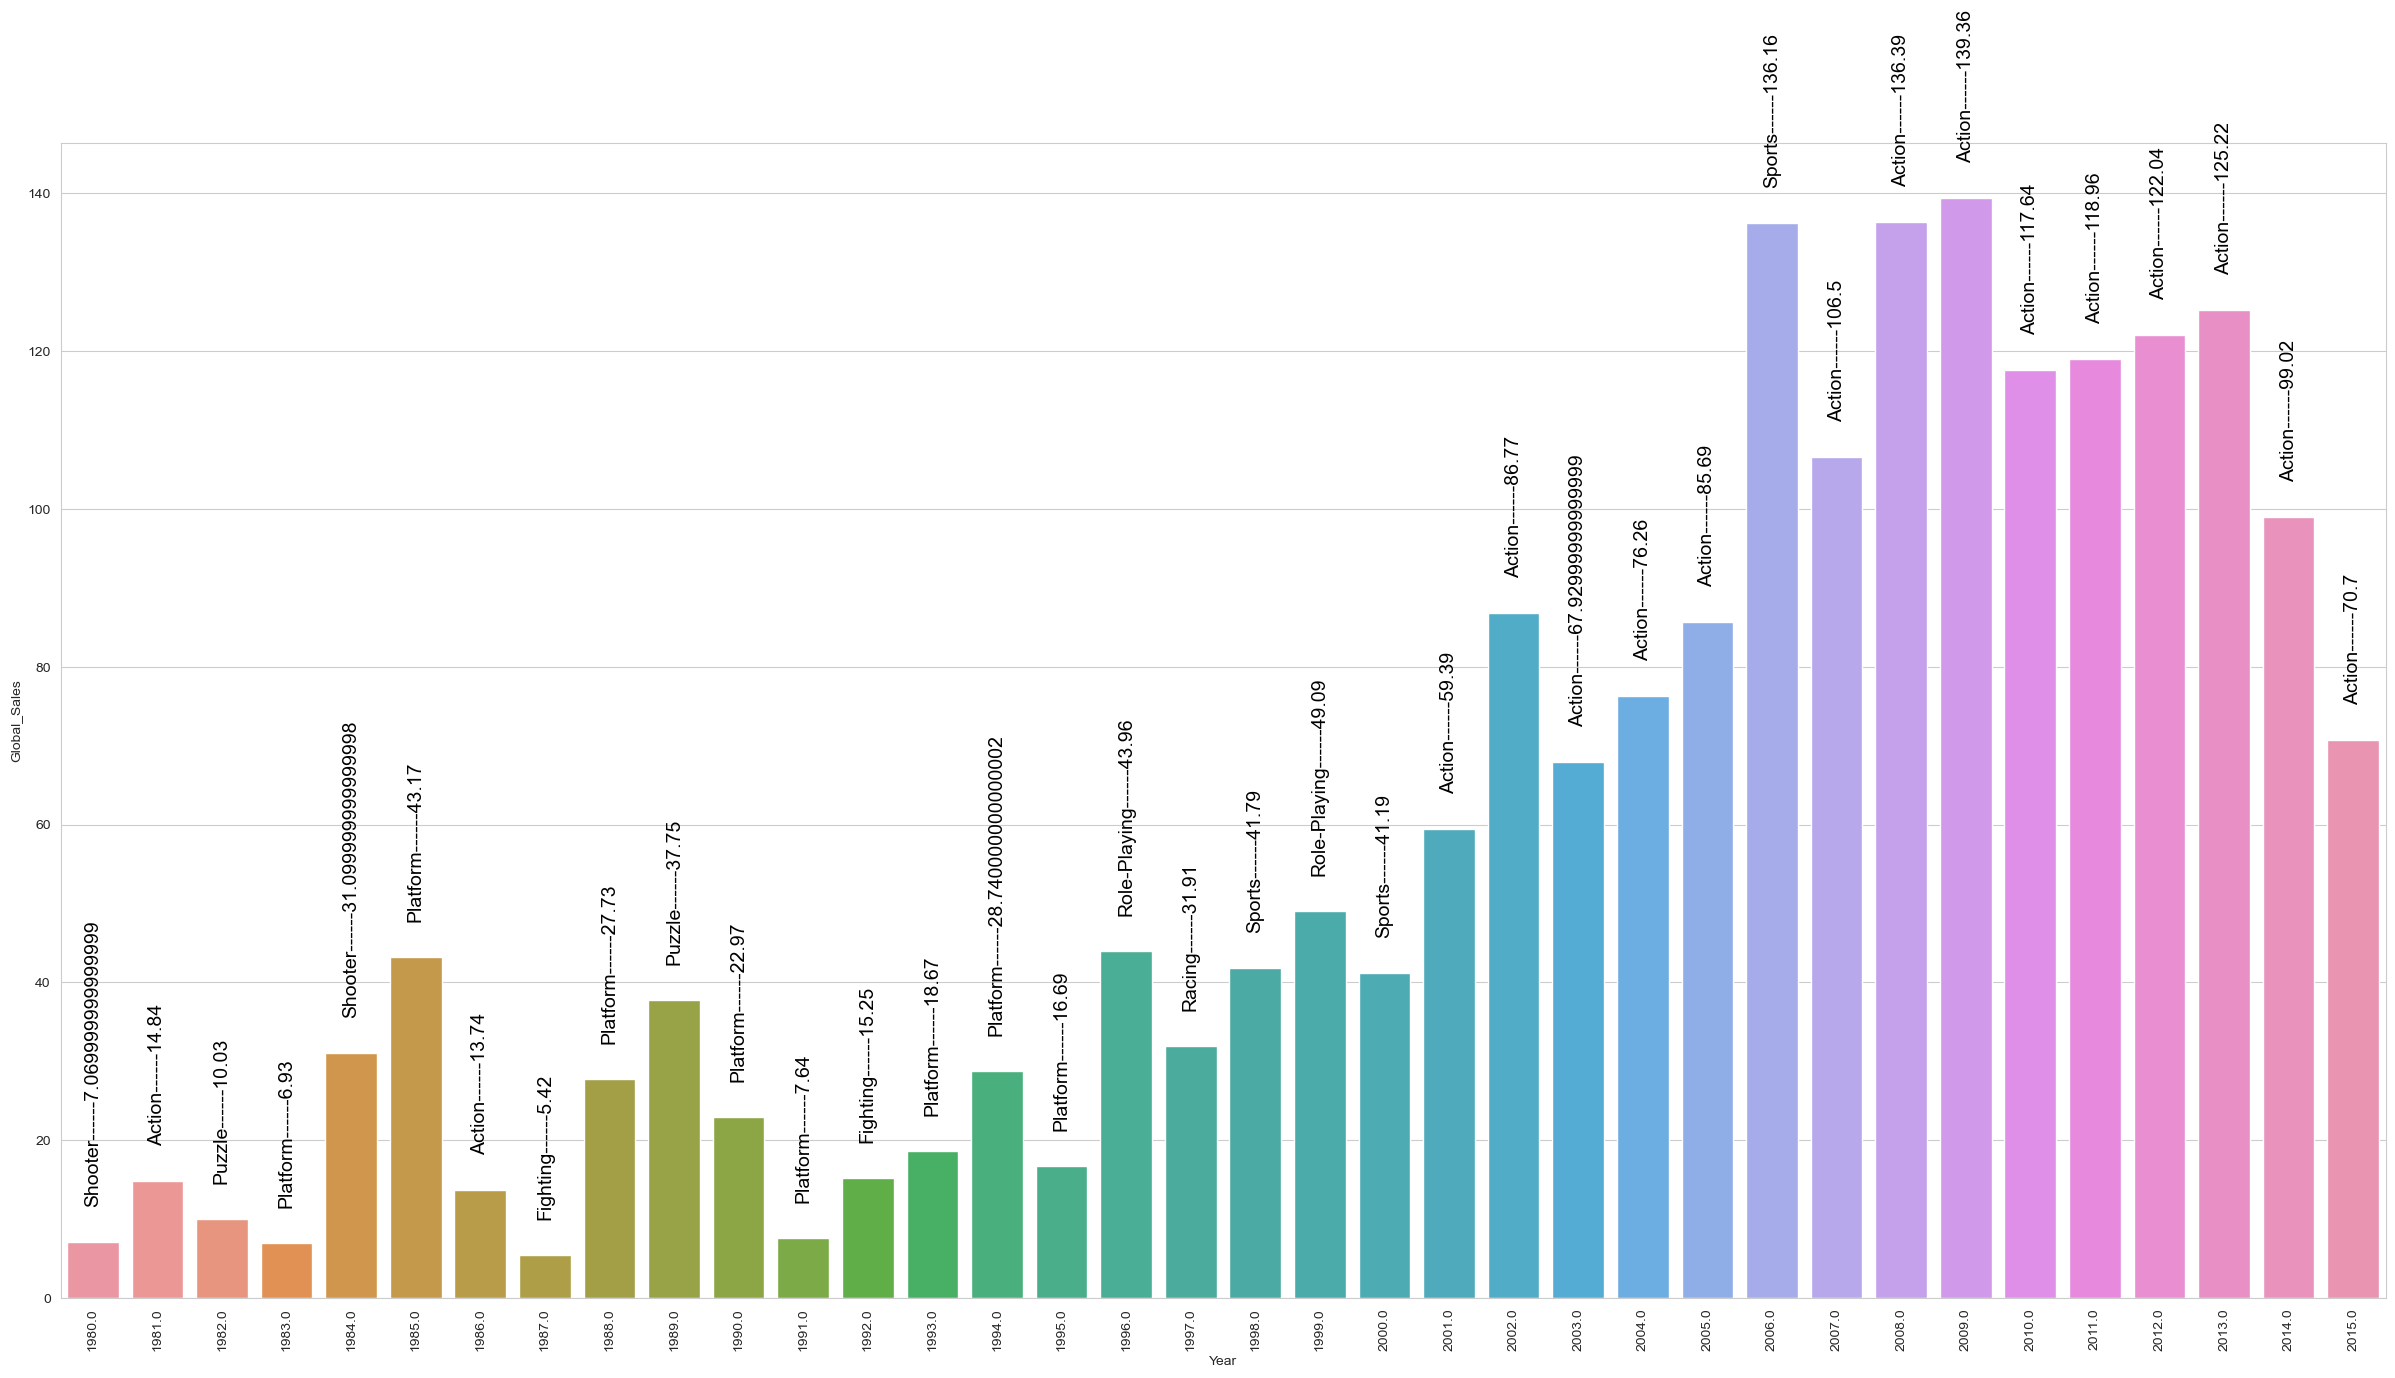

In [43]:
plt.figure(figsize=(30,15))
g=sns.barplot(x="Year",y="Global_Sales",data=year_sale_max)
index=0
for value in year_sale_max["Global_Sales"]:   #for döngüsünde her çubuk üzerine ilgili türün ve sayısının yazılmasını sağladık
    g.text(index,value+5,str(genre[index] + "------" + str(value)) , color="#000",size=14,rotation=90,ha="center")
    index+=1 
plt.xticks(rotation=90)
plt.show  

In [45]:
#Küresel olarak en yüksek satış fiyatına sahip oyun türü
data_genre=data.groupby(by=["Genre"])["Global_Sales"].sum() #genre sütununa göre gruplandırıp global_sale sütunundaki değerleri hesapladık
data_genre=data_genre.reset_index() #oluşturulan seri nesnelere veri çerçevesine dönüştürüldü
data_genre=data_genre.sort_values(by=["Global_Sales"],ascending=False) #global_sale sütununa göre veri çerçevesi sıralandı en yüksek satış fıyatına sahip türün en üstte sıralanması sağlandı

<function matplotlib.pyplot.show(close=None, block=None)>

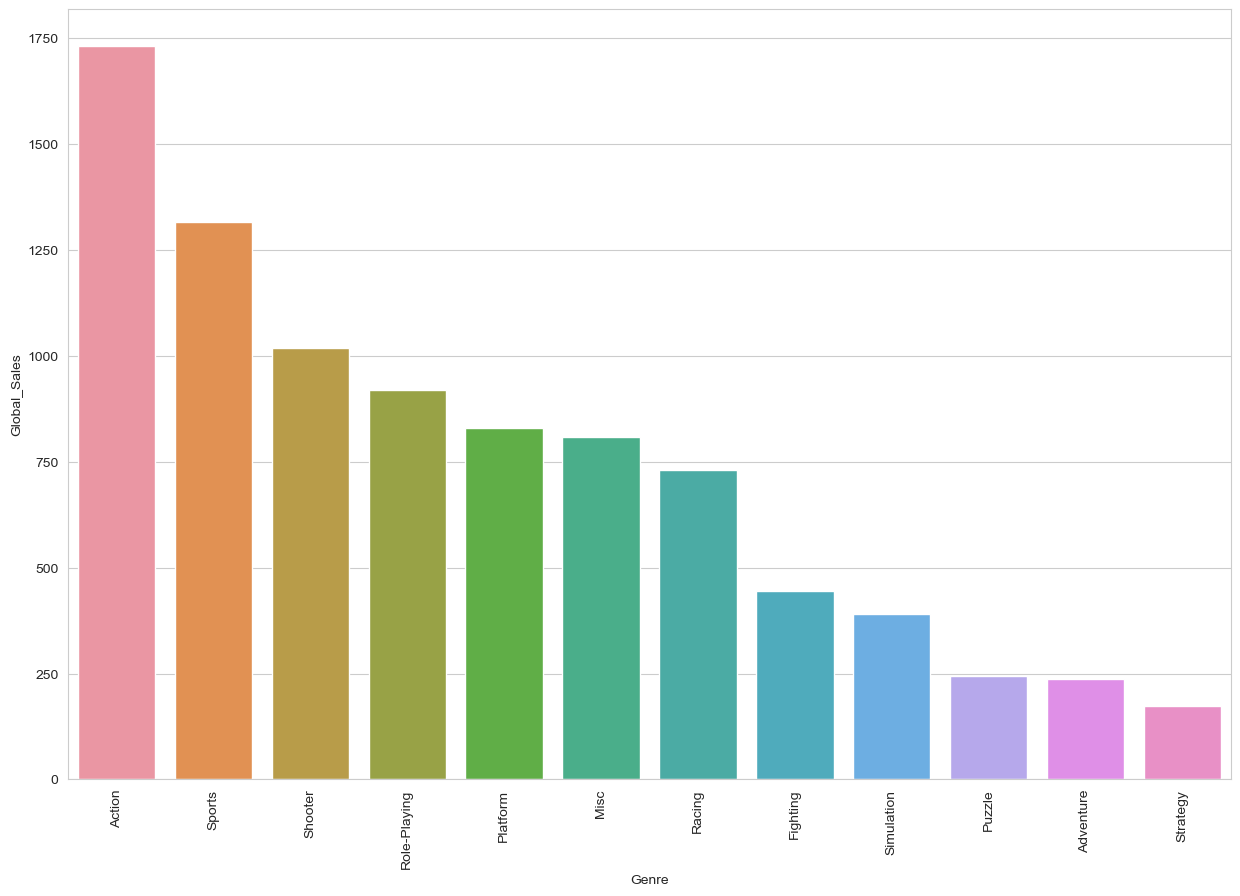

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x="Genre", y="Global_Sales",data=data_genre)
plt.xticks(rotation=90)
plt.show

In [47]:
#Küresel anlamda en yüksek satış fiyatına sahip oyun platformu
data_platform=data.groupby(by=["Platform"])["Global_Sales"].sum()
data_platform=data_platform.reset_index()
data_platform=data_platform.sort_values(by=["Global_Sales"],ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

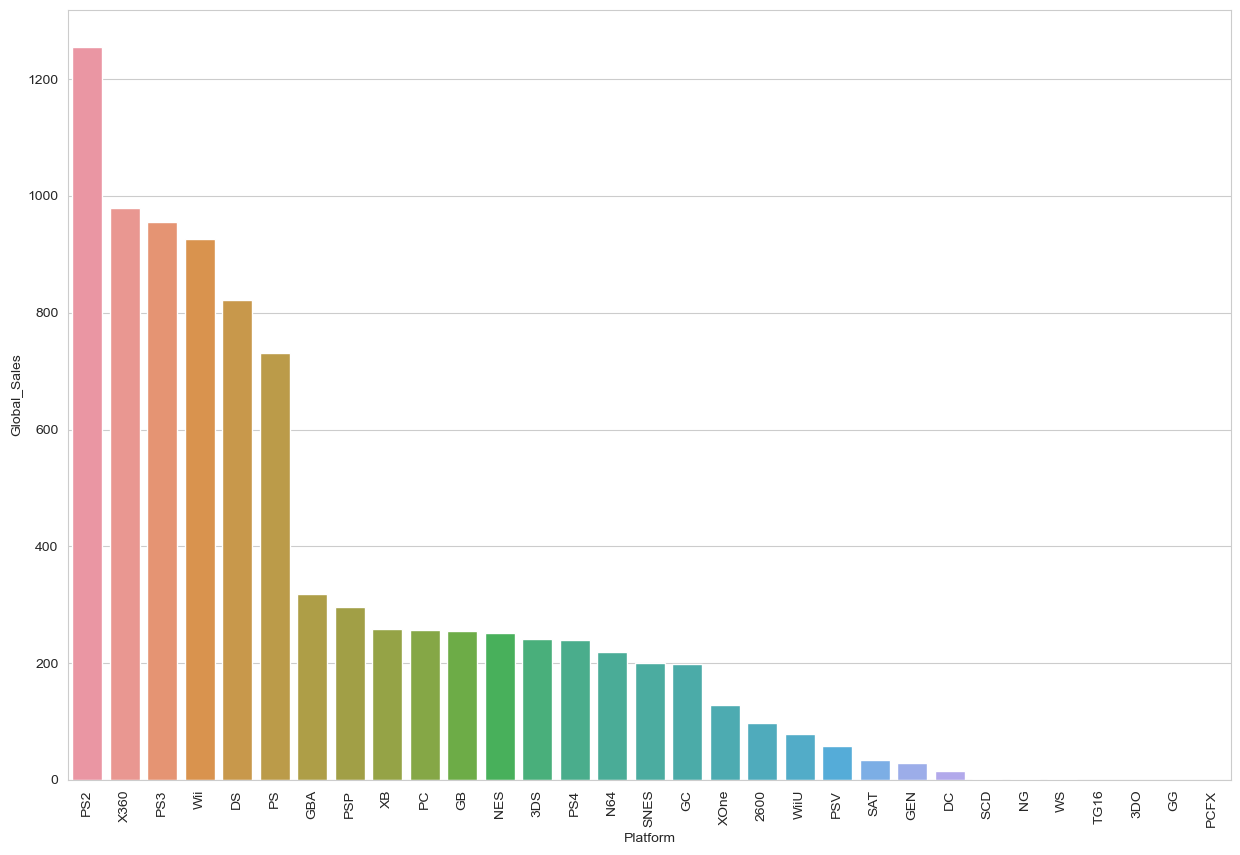

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(x="Platform", y="Global_Sales",data=data_platform)
plt.xticks(rotation=90)
plt.show

In [51]:
top_game_sale=data.head(20)
top_game_sale=top_game_sale[["Name","Year","Genre","Global_Sales"]]
top_game_sale=top_game_sale.sort_values(by=["Global_Sales"],ascending=False)


In [52]:
name=top_game_sale["Name"]
year=top_game_sale["Year"]
y=np.arange(0,20)

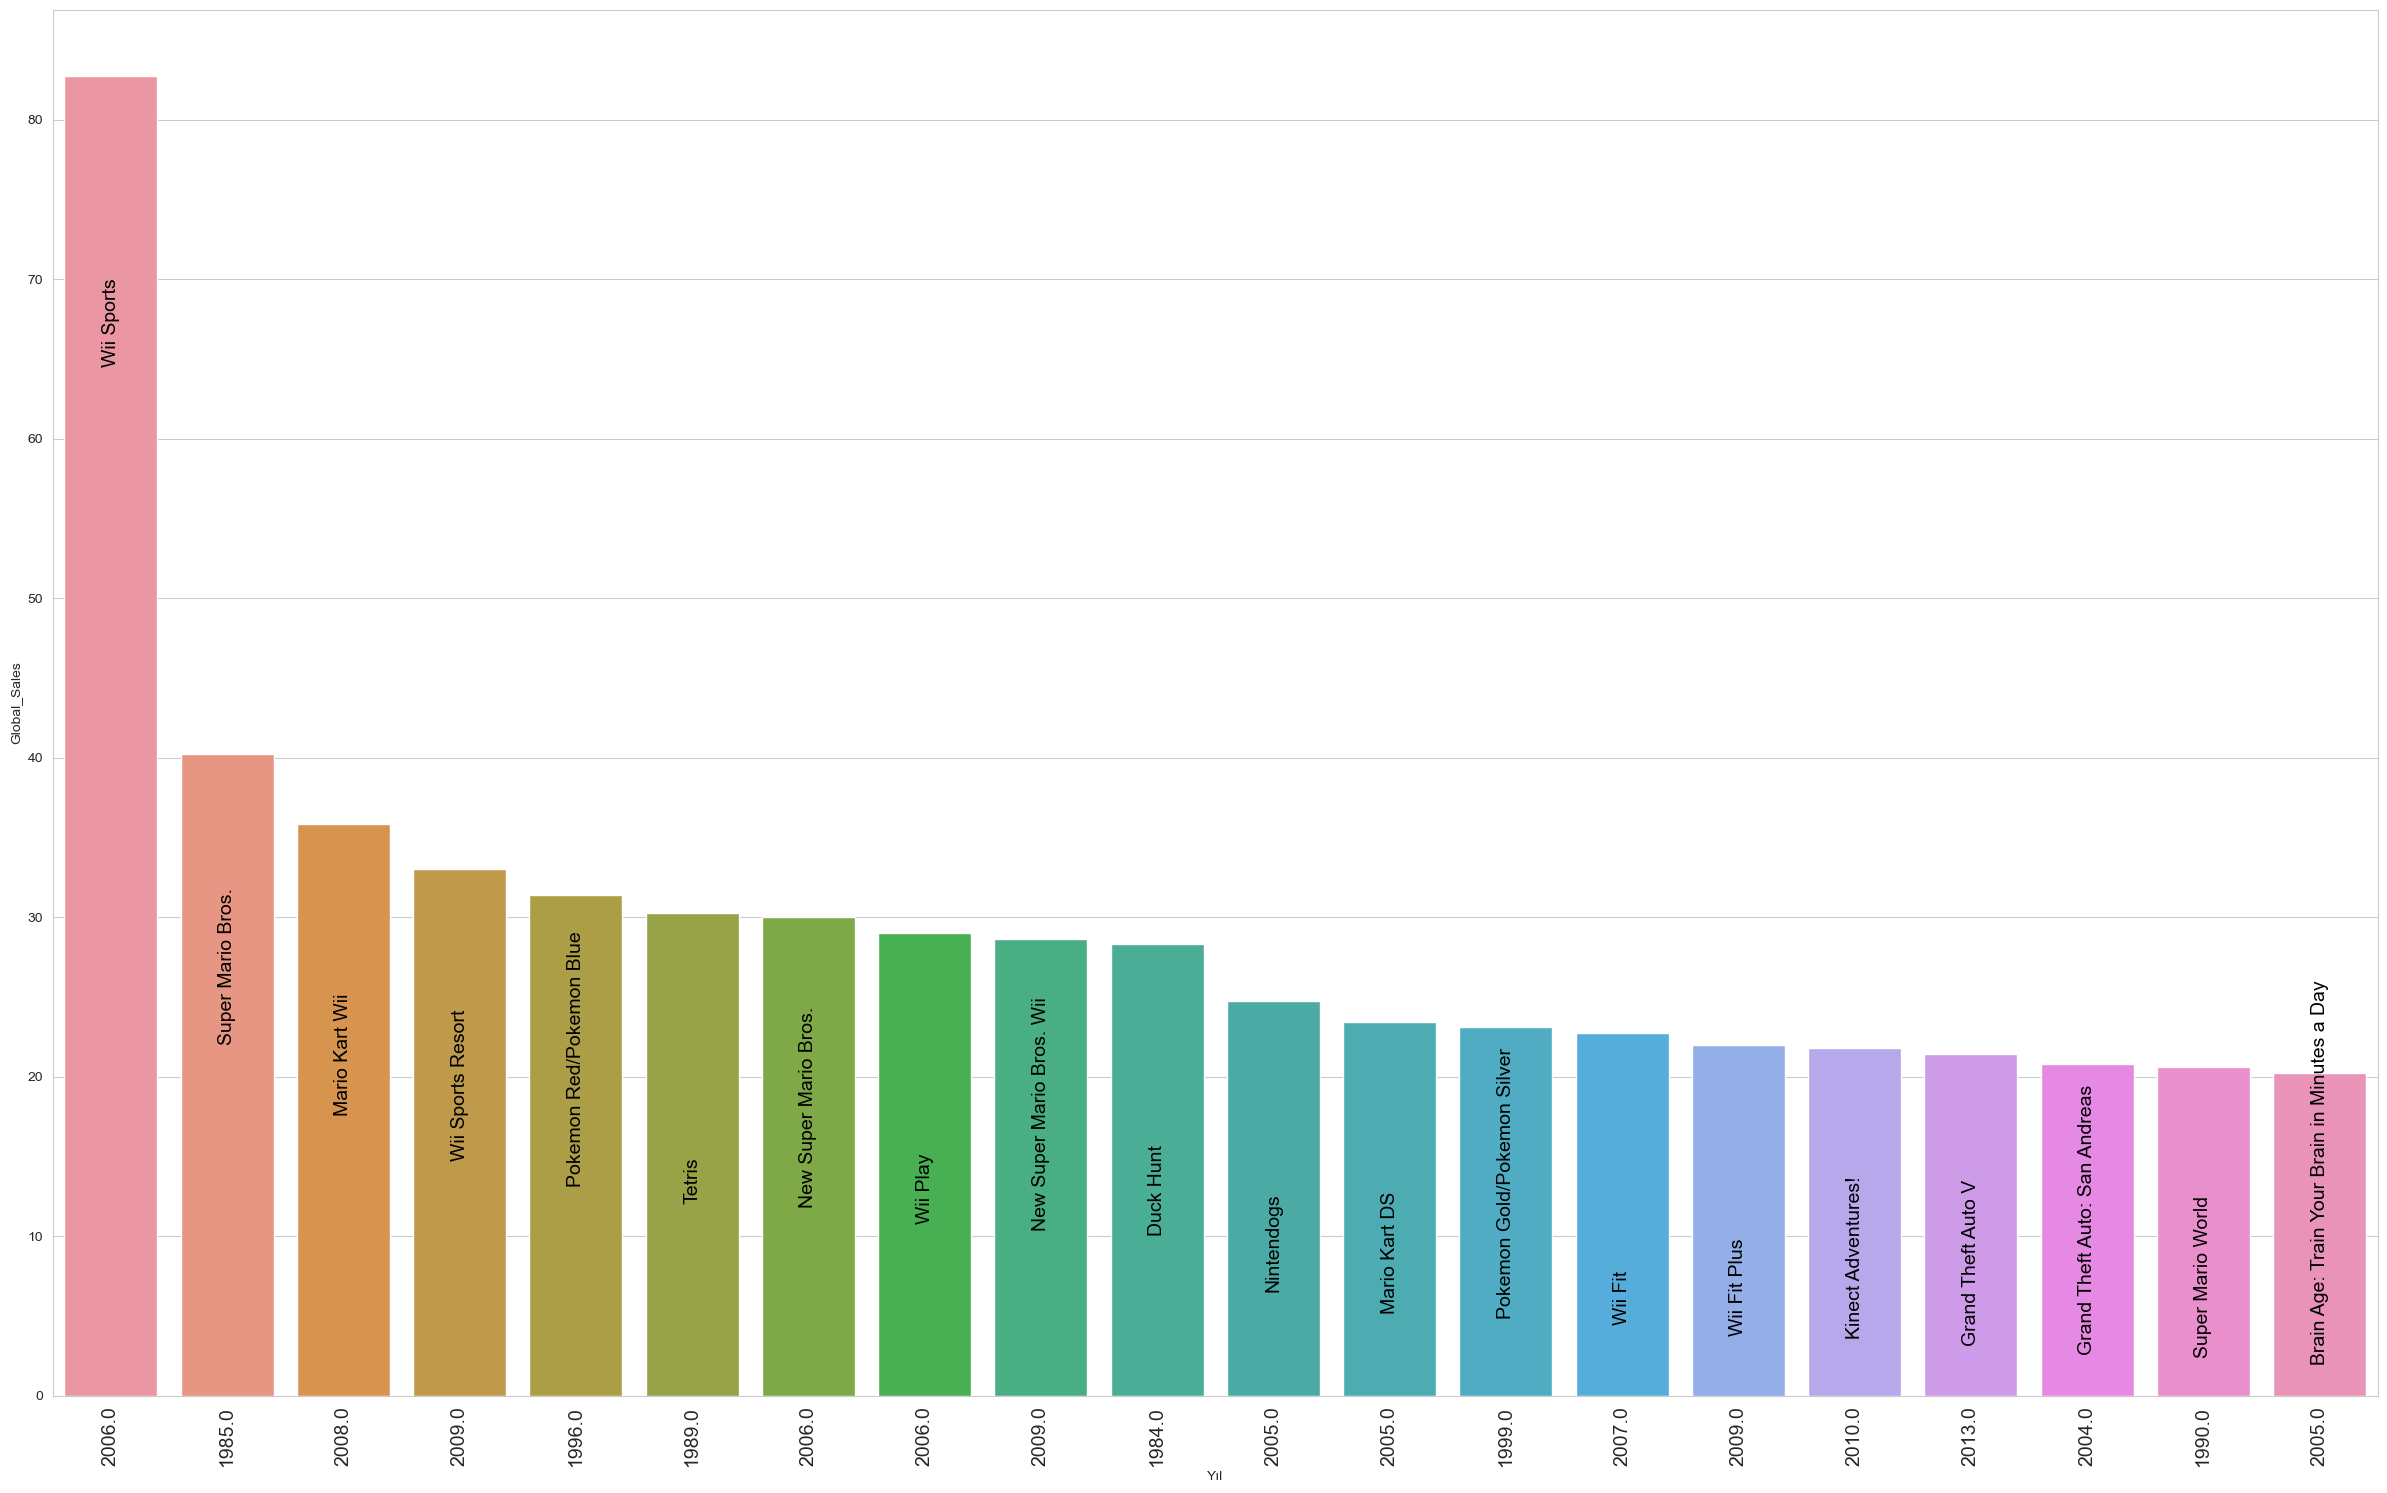

In [55]:
plt.figure(figsize=(30,18))
g=sns.barplot(x="Name",y="Global_Sales",data=top_game_sale)
index=0
for value in top_game_sale["Global_Sales"]:   #for döngüsünde her çubuk üzerine ilgili türün ve sayısının yazılmasını sağladık
    g.text(index,value-18,name[index], color="#000",size=14,rotation=90,ha="center")
    index+=1 
plt.xticks(y,top_game_sale["Year"],fontsize=14,rotation=90)
plt.xlabel("Yıl")
plt.show() 

In [56]:
#Türlere göre satışları karşılaştırma
comp_genre=data[["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
comp_map=comp_genre.groupby(by=["Genre"]).sum()

<function matplotlib.pyplot.show(close=None, block=None)>

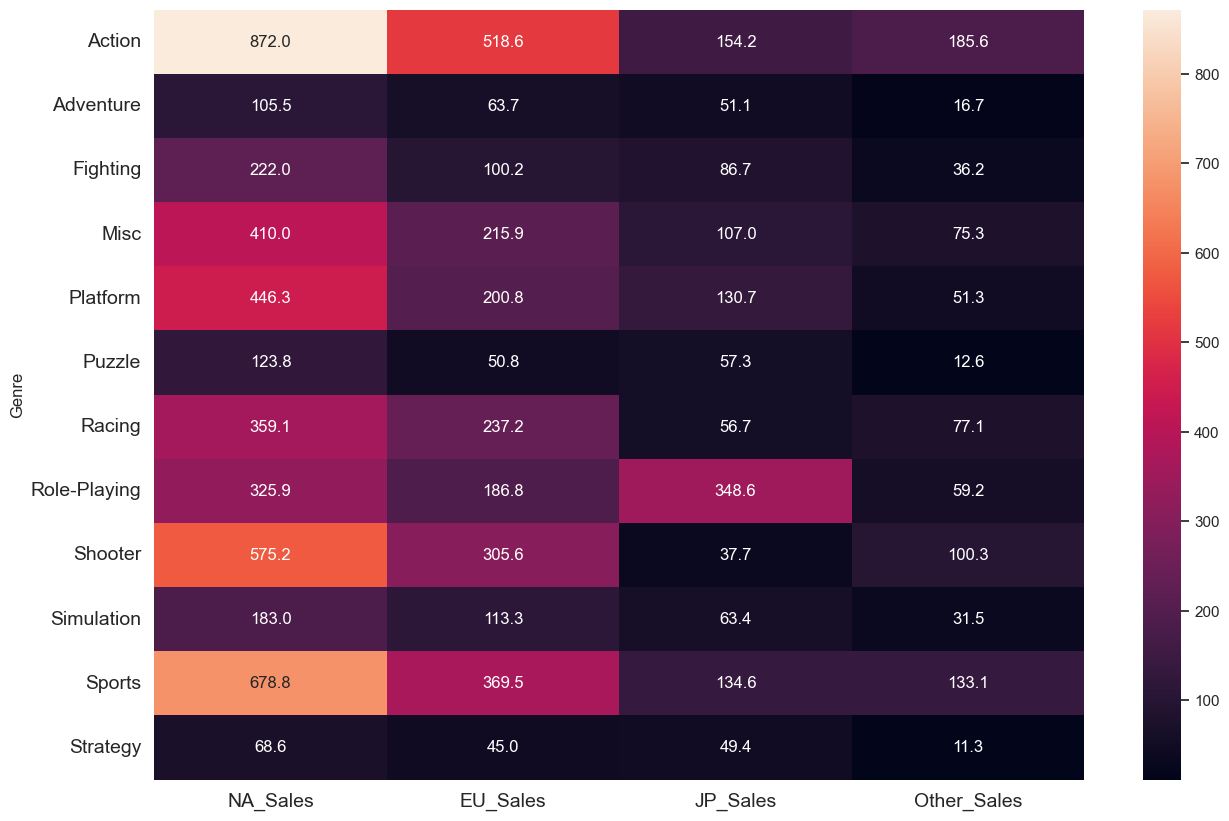

In [57]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.heatmap(comp_map,annot=True,fmt=".1F")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

In [62]:
#Bir dataframe oluşturup veri ayıklaması yapalım
comp_table=comp_map.reset_index()
comp_table=pd.melt(comp_table,id_vars=["Genre"],value_vars=["Genre","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],var_name="Sale_Area",value_name="Sale_Price")
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,871.96
1,Adventure,NA_Sales,105.46
2,Fighting,NA_Sales,221.99
3,Misc,NA_Sales,410.02
4,Platform,NA_Sales,446.26


<Axes: xlabel='Genre', ylabel='Sale_Price'>

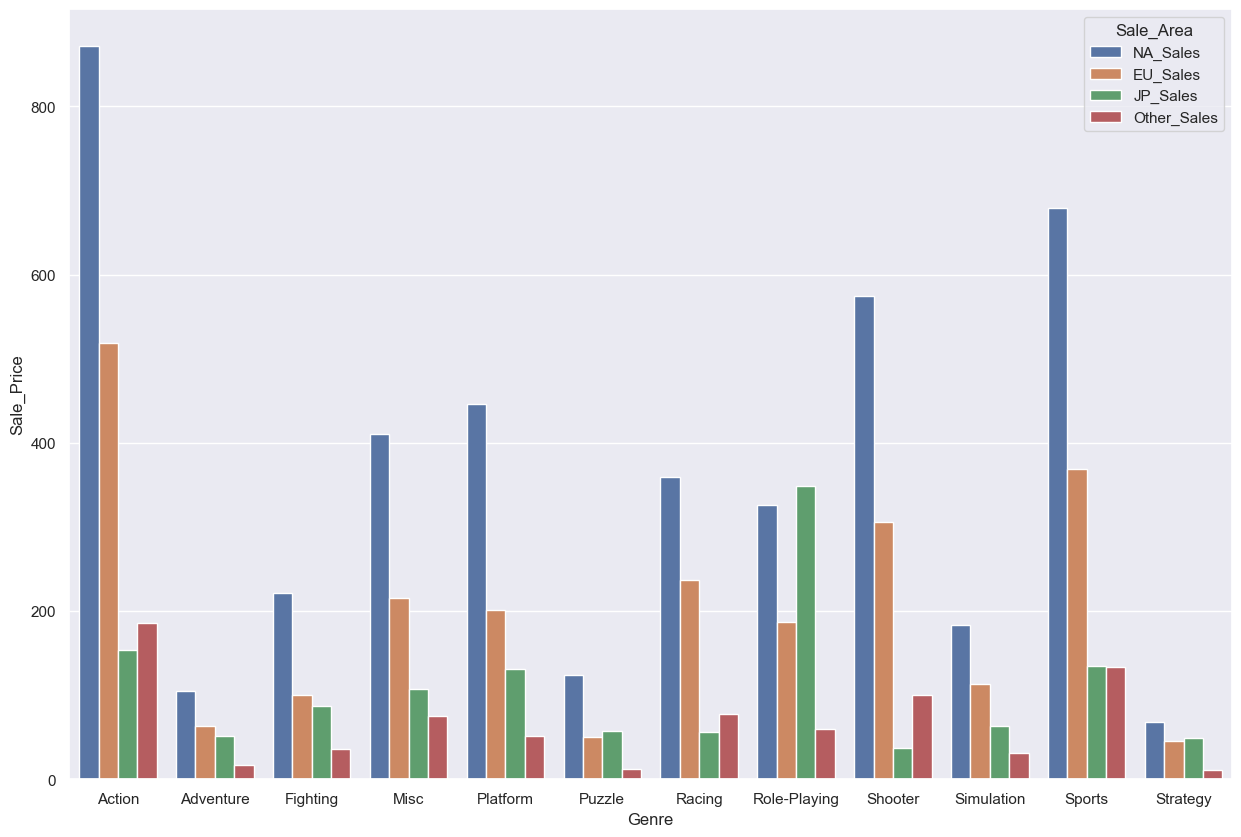

In [63]:
plt.figure(figsize=(15,10))
sns.barplot(x="Genre",y="Sale_Price",hue="Sale_Area",data=comp_table)

In [64]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [68]:
comp_platform=data[["Platform","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
comp_platform.head()

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Wii,41.49,29.02,3.77,8.46
1,NES,29.08,3.58,6.81,0.77
2,Wii,15.85,12.88,3.79,3.31
3,Wii,15.75,11.01,3.28,2.96
4,GB,11.27,8.89,10.22,1.00


In [69]:
comp_platform=comp_platform.groupby(by=["Platform"]).sum().reset_index()

In [70]:
comp_table=pd.melt(comp_platform,id_vars=["Platform"],value_vars=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],var_name="Sale_Area",value_name="Sale_Price")
comp_table.head()

,Platform,Sale_Area,Sale_Price
0,2600,NA_Sales,90.60
1,3DO,NA_Sales,0.00
2,3DS,NA_Sales,78.04
3,DC,NA_Sales,5.43
4,DS,NA_Sales,390.44


<function matplotlib.pyplot.show(close=None, block=None)>

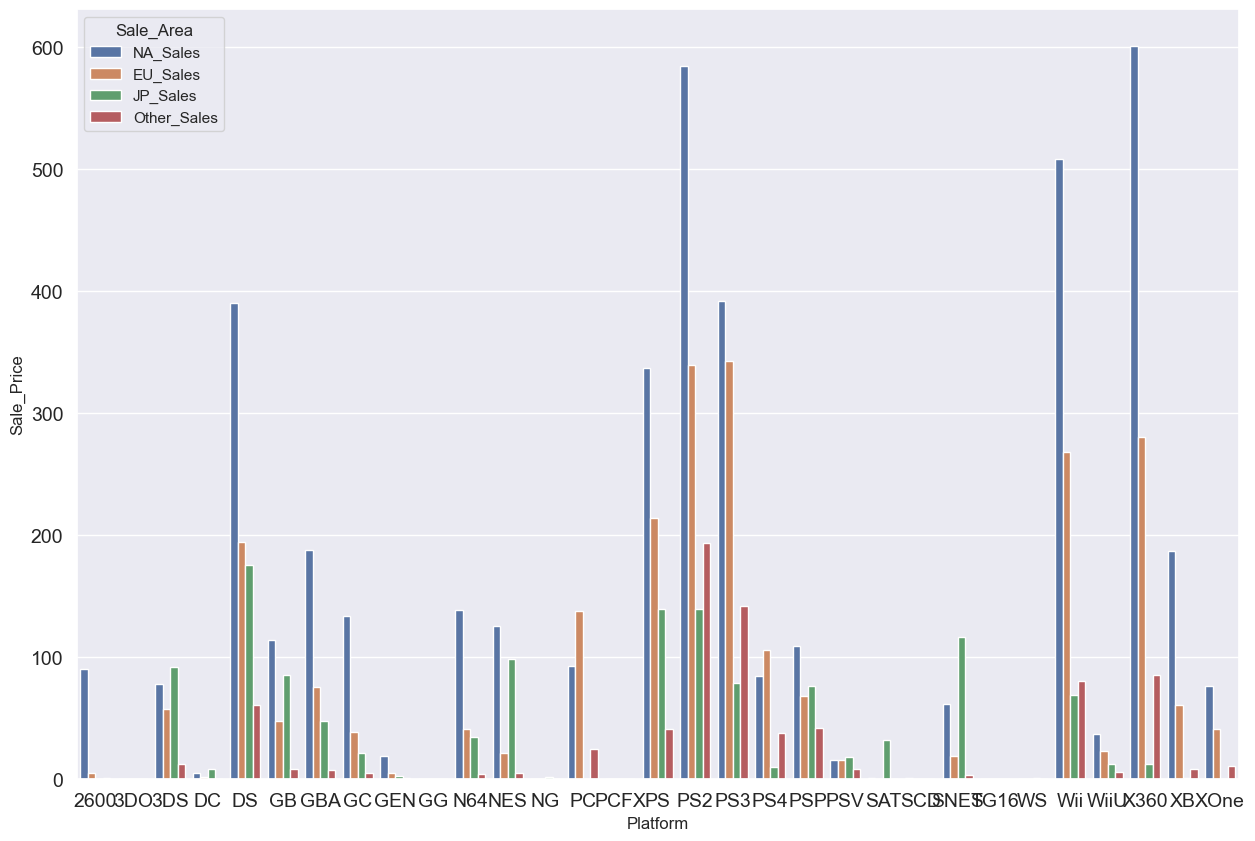

In [71]:
plt.figure(figsize=(15,10))
sns.barplot(x="Platform",y="Sale_Price",hue="Sale_Area",data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show

In [72]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [73]:
#En iyi 20 yayıncıyı bulma
top_publisher=data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).head(20)
top_publisher=pd.DataFrame(top_publisher).reset_index()

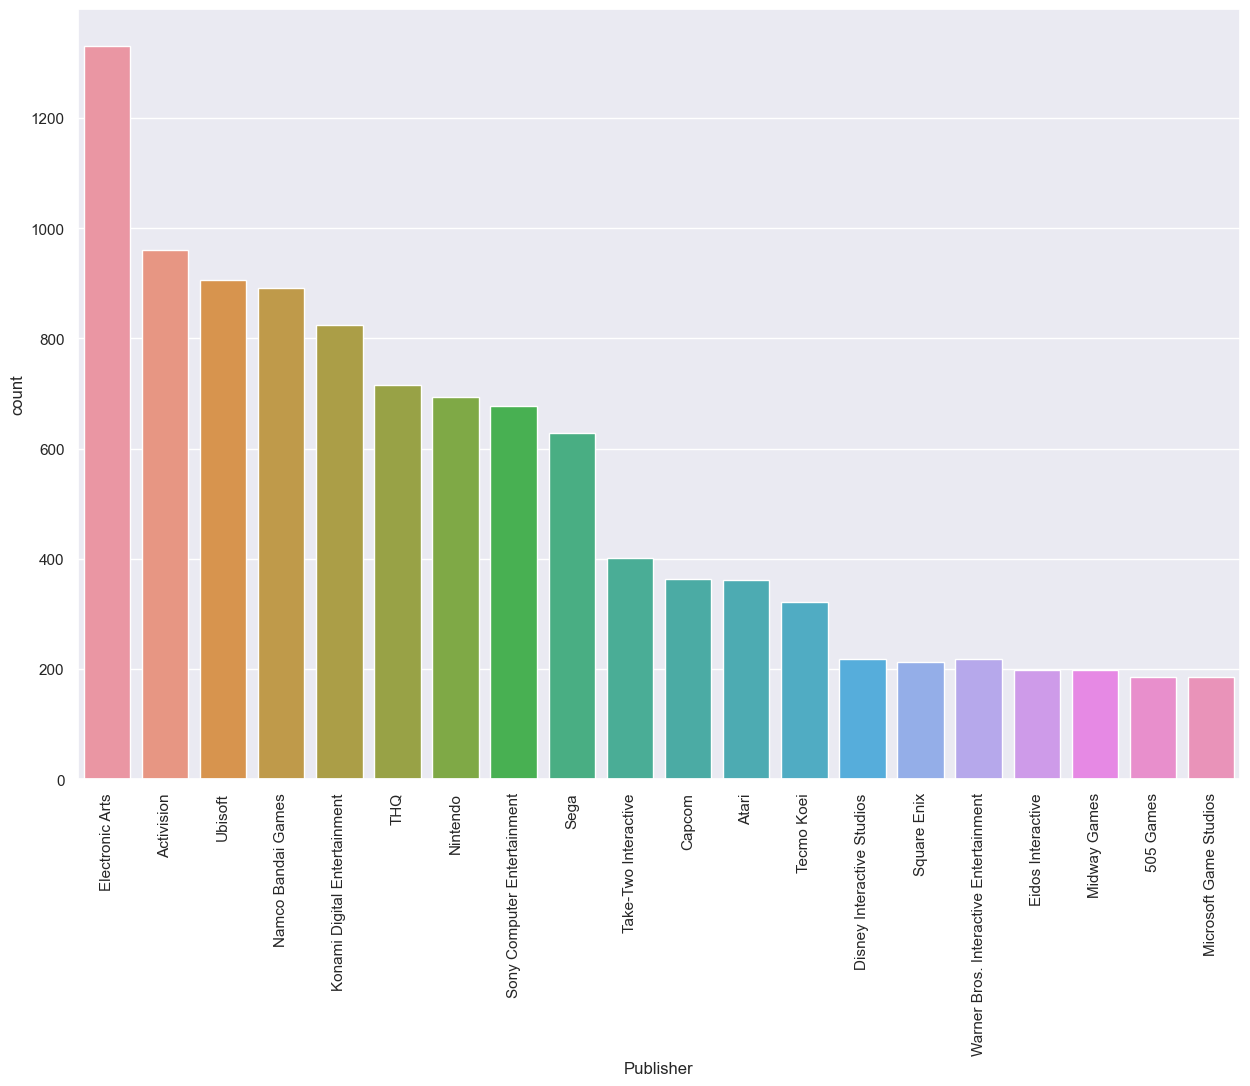

In [77]:
plt.figure(figsize=(15,10))
sns.countplot(x="Publisher",data=data,order=data.groupby(by=["Publisher"])["Year"].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.show()

In [79]:
#Yayıncılar arasındaki en yüksel küresel satışlar kime ait?
sale_pbl=data[["Publisher","Global_Sales"]]
sale_pbl=sale_pbl.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head()
sale_pbl=pd.DataFrame(sale_pbl).reset_index()

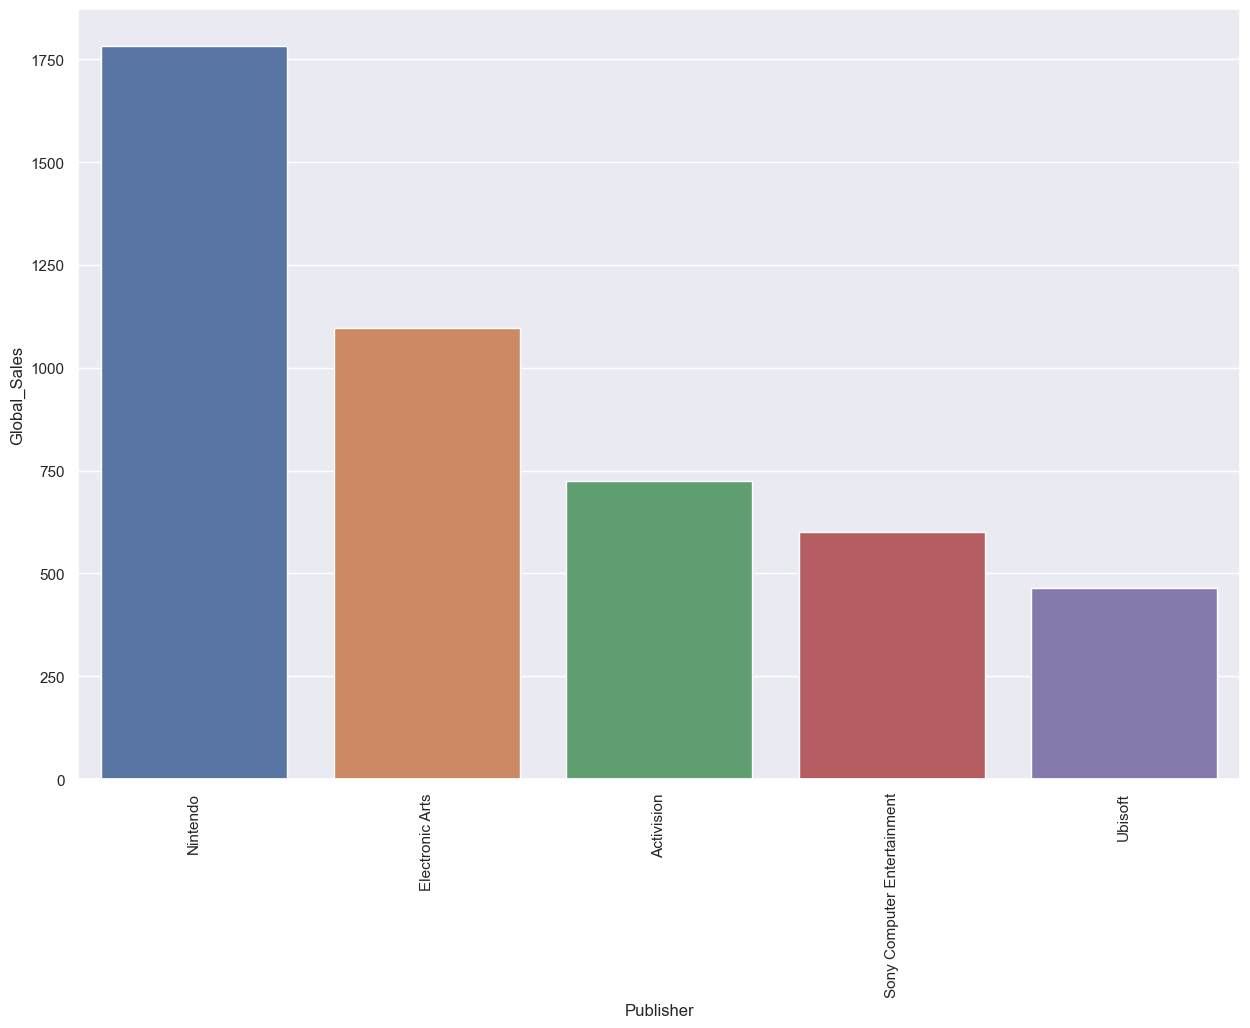

In [80]:
plt.figure(figsize=(15,10))
sns.barplot(x="Publisher",y="Global_Sales",data=sale_pbl)
plt.xticks(rotation=90)
plt.show()

In [82]:
comp_publisher=data[["Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [83]:
comp_publisher=comp_publisher.groupby(by=["Publisher"]).sum().reset_index().sort_values(by=["Global_Sales"],ascending=False)
comp_publisher=comp_publisher.head()

In [84]:
comp_publisher=pd.melt(comp_publisher,id_vars=["Publisher"],value_vars=["NA_Sales","EU_Sales","JP_Sales","Other_Sales"],var_name="Sale_Area",value_name="Sale_Price")
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,815.71
1,Electronic Arts,NA_Sales,591.43
2,Activision,NA_Sales,428.03
3,Sony Computer Entertainment,NA_Sales,262.79
4,Ubisoft,NA_Sales,249.31
5,Nintendo,EU_Sales,417.81
6,Electronic Arts,EU_Sales,364.36
7,Activision,EU_Sales,214.14
8,Sony Computer Entertainment,EU_Sales,184.85
9,Ubisoft,EU_Sales,158.94


<function matplotlib.pyplot.show(close=None, block=None)>

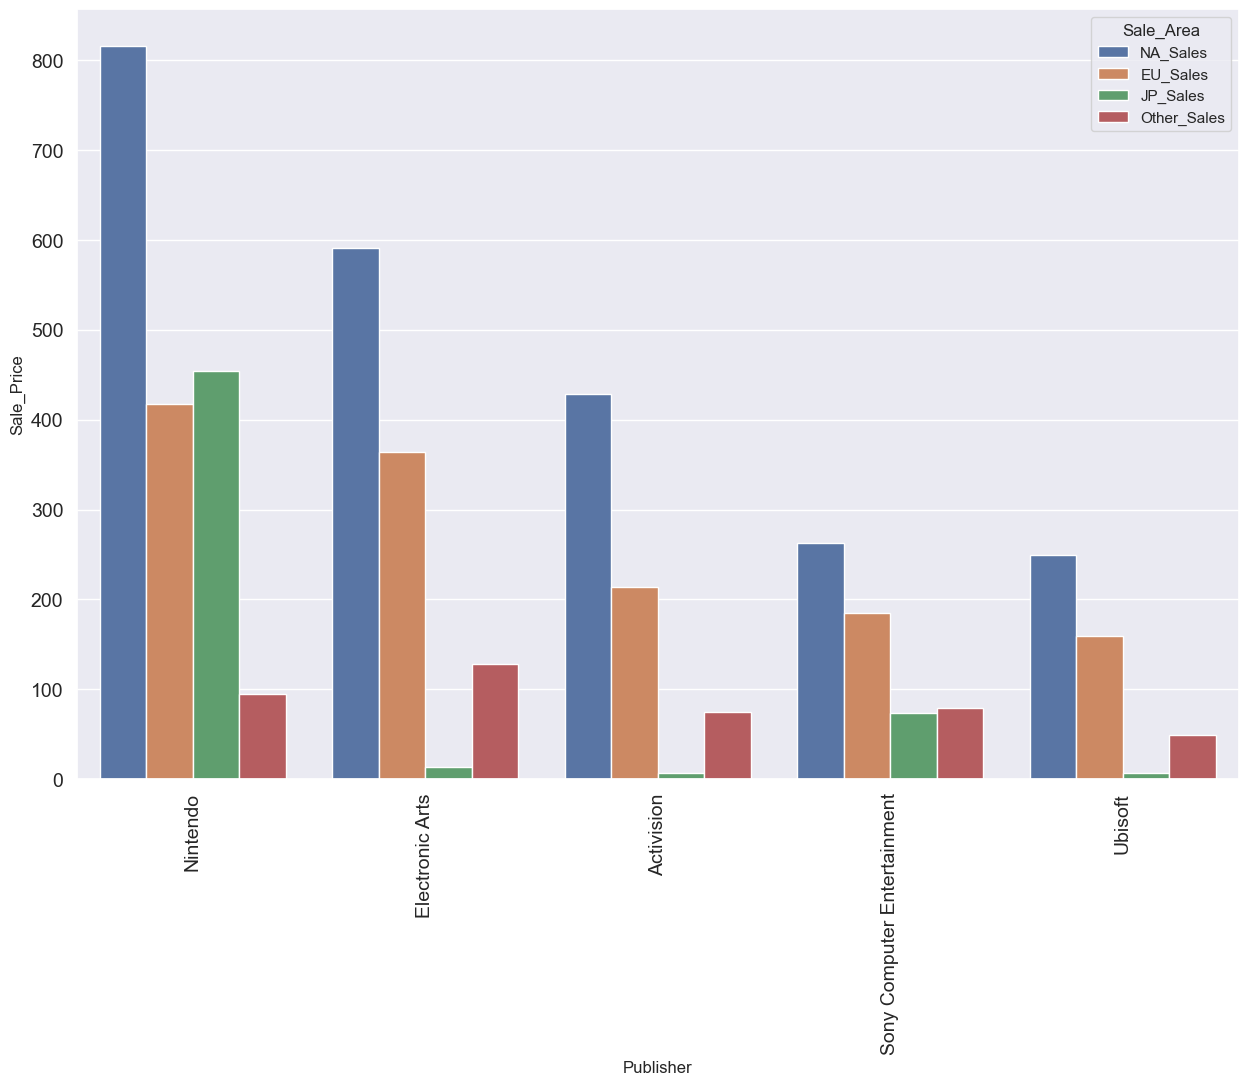

In [85]:
plt.figure(figsize=(15,10))
sns.barplot(x="Publisher",y="Sale_Price",hue="Sale_Area",data=comp_publisher)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.show

In [86]:
#Her yıl için en çok oyun yayınlayan yayıncılar
top_publisher = data[['Year', 'Publisher']]
top_publisher_df = top_publisher.groupby(by=['Year', 'Publisher']).size().reset_index(name='Count')
top_publisher_idx = top_publisher_df.groupby(by=['Year'])['Count'].transform(max) == top_publisher_df['Count']
top_publisher_count = top_publisher_df[top_publisher_idx].reset_index(drop=True)
top_publisher_count = top_publisher_count.drop_duplicates(subset=["Year", "Count"],keep='last').reset_index(drop=True)

In [87]:
publisher= top_publisher_count['Publisher']

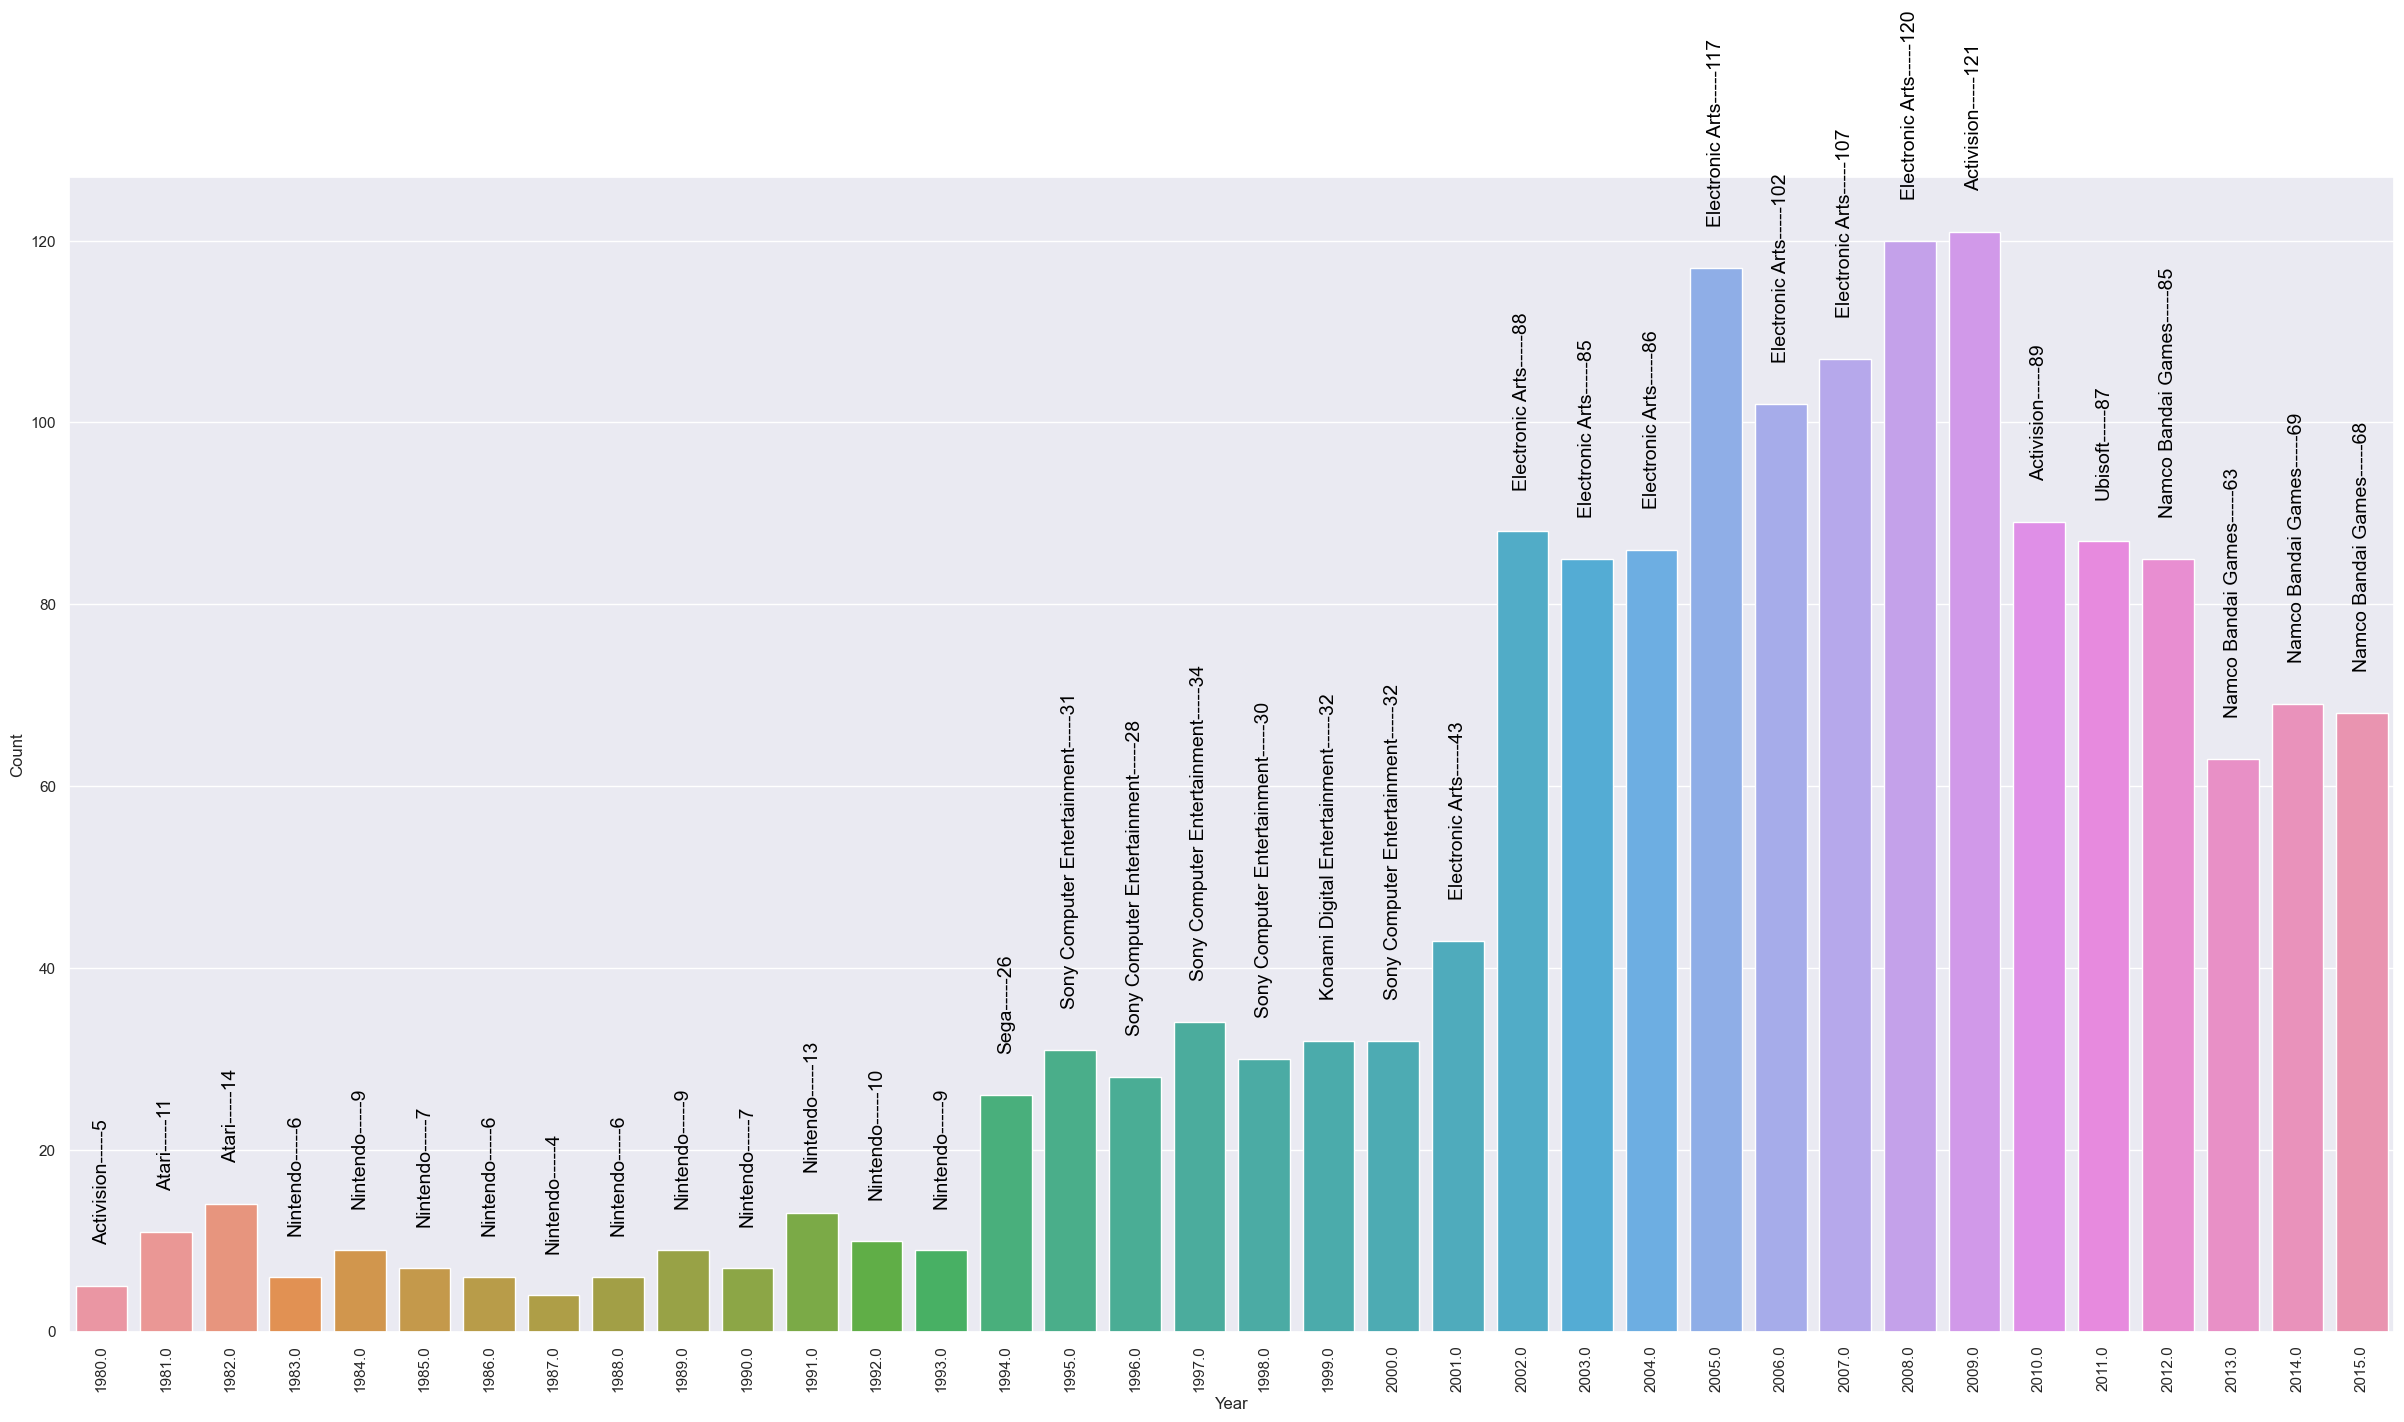

In [89]:
plt.figure(figsize=(30,15))
g = sns.barplot(x='Year', y='Count', data=top_publisher_count)
index = 0
for value in top_publisher_count['Count'].values:
#      print(asd)
    g.text(index, value + 5, str(publisher[index] + '-----' + str(value)), color='#000', size=14, rotation=90, ha="center")
    index+=1
plt.xticks(rotation=90)
plt.show()